In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
ds = pd.read_csv('student_loan_data.csv')
print(ds.shape)
ds.head()

(8185, 19)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Processed Complaint
0,2023-12-07,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Problem with customer service,In took 1 quarter at XXXX XXXX. In that quarte...,Company believes it acted appropriately as aut...,MOHELA,OH,457XX,NaN,Consent provided,Web,2023-12-07,Closed with explanation,Yes,NaN,7958117,took quarter xxxx xxxx. quarter subsidized loa...
1,2023-12-29,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Trouble with how payments are being handled,My student loan provider is currently Nelnet. ...,NaN,"Nelnet, Inc.",IA,50265,NaN,Consent provided,Web,2023-12-29,Closed with explanation,Yes,NaN,8080675,student loan provider currently nelnet. making...
2,2023-11-13,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Received bad information about your loan,on XX/XX/25 I went to student aid.gov and appl...,NaN,"Maximus Federal Services, Inc.",CA,955XX,NaN,Consent provided,Web,2023-11-13,Closed with explanation,Yes,NaN,7844168,xx/xx/ went student aid.gov applied save progr...
3,2023-11-13,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Co-signer,In response to claim number XXXX Nelnet employ...,NaN,"Nelnet, Inc.",TN,37115,NaN,Consent provided,Web,2023-11-13,Closed with explanation,Yes,NaN,7844744,response claim number xxxx nelnet employee ( x...
4,2023-10-17,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Problem with customer service,I am an authorized payor on my son 's Nelnet a...,NaN,"Nelnet, Inc.",NC,284XX,NaN,Consent provided,Web,2023-10-17,Closed with explanation,Yes,NaN,7712911,authorized payor son 's nelnet account. signin...


In [3]:
import re


# Define a regex pattern to match words made up entirely of the letter 'x'
pattern = r"^x+$"

# Function to extract matching words from a cell
def extract_x_words(cell):
    if isinstance(cell, str):  # Check if the cell contains text
        return [word for word in cell.split() if re.fullmatch(pattern, word)]
    return []

# Extract matching words only from the 'Processed Complaint' column
all_x_words = []
if 'Processed Complaint' in ds.columns:
    ds['Processed Complaint'].apply(lambda cell: all_x_words.extend(extract_x_words(cell)))

# Remove duplicates and sort the list of x-words
unique_x_words = sorted(set(all_x_words))

# Print the results
print("Words made up entirely of 'x' in the 'Processed Complaint' column:")
print(unique_x_words)

Words made up entirely of 'x' in the 'Processed Complaint' column:
['x', 'xxxx', 'xxxxx', 'xxxxxxxx', 'xxxxxxxxxxxx']


In [4]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
ds = pd.read_csv('student_loan_data.csv')
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

ds["Processed Complaint"] = ds["Processed Complaint"].apply(lambda text: lemmatize_words(text))
ds.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Processed Complaint
0,2023-12-07,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Problem with customer service,In took 1 quarter at XXXX XXXX. In that quarte...,Company believes it acted appropriately as aut...,MOHELA,OH,457XX,NaN,Consent provided,Web,2023-12-07,Closed with explanation,Yes,NaN,7958117,take quarter xxxx xxxx. quarter subsidize loan...
1,2023-12-29,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Trouble with how payments are being handled,My student loan provider is currently Nelnet. ...,NaN,"Nelnet, Inc.",IA,50265,NaN,Consent provided,Web,2023-12-29,Closed with explanation,Yes,NaN,8080675,student loan provider currently nelnet. make p...
2,2023-11-13,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Received bad information about your loan,on XX/XX/25 I went to student aid.gov and appl...,NaN,"Maximus Federal Services, Inc.",CA,955XX,NaN,Consent provided,Web,2023-11-13,Closed with explanation,Yes,NaN,7844168,xx/xx/ go student aid.gov apply save program s...
3,2023-11-13,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Co-signer,In response to claim number XXXX Nelnet employ...,NaN,"Nelnet, Inc.",TN,37115,NaN,Consent provided,Web,2023-11-13,Closed with explanation,Yes,NaN,7844744,response claim number xxxx nelnet employee ( x...
4,2023-10-17,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Problem with customer service,I am an authorized payor on my son 's Nelnet a...,NaN,"Nelnet, Inc.",NC,284XX,NaN,Consent provided,Web,2023-10-17,Closed with explanation,Yes,NaN,7712911,authorize payor son 's nelnet account. sign po...


In [5]:
import numpy as np
import pandas as pd
import re
import spacy
import string
pd.options.mode.chained_assignment = None

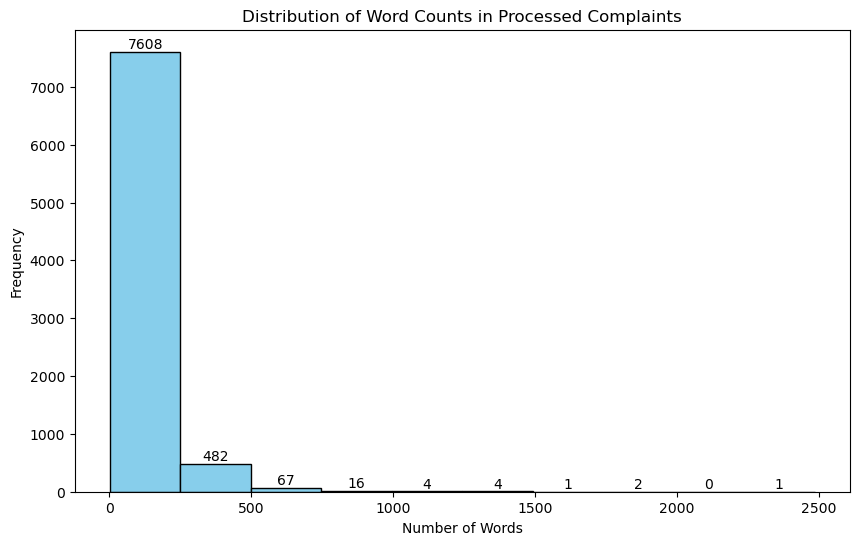

In [6]:
import matplotlib.pyplot as plt



# Calculate the number of words in each complaint
ds['Word Count'] = ds['Processed Complaint'].apply(lambda x: len(x.split()))

# Plot histogram
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(ds['Word Count'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in Processed Complaints')

# Adding frequency labels on top of each bar
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, 
             n[i], 
             int(n[i]), 
             ha='center', 
             va='bottom')

plt.show()


In [7]:
from bertopic import BERTopic
from sklearn.metrics import silhouette_score
from sklearn.metrics import jaccard_score
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import hdbscan
from gensim.models import CoherenceModel
from sklearn.metrics.pairwise import cosine_similarity
from gensim.corpora.dictionary import Dictionary
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [8]:
# Function to calculate a basic topic diversity score
def calculate_topic_diversity(topic_model):
    unique_words = set()
    total_words = 0
    for topic in topic_model.get_topics().values():
        words = [word for word, _ in topic]  # Extract top words
        unique_words.update(words)
        total_words += len(words)
    diversity_score = len(unique_words) / total_words
    return diversity_score
def sigmoid(x):
    """
    Sigmoid function for standardizing values to (0, 1).
    """
    return 1 / (1 + np.exp(-1.0456*(x+5.60)))

def calculate_and_average_coherence_scores(topic_model, texts, dictionary):
    """
    Calculate C_v, C_umass, and C_npmi coherence scores for a BERTopic model,
    standardize them to [0, 1], and return the average standardized score.
    
    Parameters:
        topic_model: BERTopic model instance
        texts: List of preprocessed texts (list of tokenized words per document)
        dictionary: Gensim dictionary created from the texts
        
    Returns:
        Average standardized coherence score
    """
    # Extract topics from BERTopic
    topics = [[word for word, _ in topic] for topic in topic_model.get_topics().values()]

    # Define coherence metrics
    metrics = {
        "c_v": {"min": 0, "max": 1},  # C_v naturally falls in [0, 1]
        "u_mass": "sigmoid",          # Use sigmoid for C_umass
        "c_npmi": {"min": -1, "max": 1},  # C_npmi falls in [-1, 1]
    }

    # Calculate coherence scores
    coherence_scores = {}
    for metric, bounds in metrics.items():
        coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence=metric)
        score = coherence_model.get_coherence()

        if metric == "u_mass":
            # Use sigmoid for standardization of C_umass
            standardized_score = sigmoid(score)  
        else:
            # Standardize using min-max scaling
            standardized_score = (score - bounds["min"]) / (bounds["max"] - bounds["min"])
            standardized_score = max(0, min(1, standardized_score))  # Clip to [0, 1]

        coherence_scores[metric] = standardized_score

    # Average of standardized coherence scores
    average_standardized_score = np.mean(list(coherence_scores.values()))

    return average_standardized_score
# Function to calculate a Cosine Similarity
def calculate_topic_representativeness(topic_embeddings, document_embeddings):
    """
    Calculate Topic Representativeness using Cosine Similarity.

    Parameters:
        topic_embeddings: 2D array (n_topics, embedding_dim) of topic embeddings.
        document_embeddings: 2D array (n_documents, embedding_dim) of document embeddings.

    Returns:
        Standardized cosine similarity score in [0, 1].
    """
    # Compute cosine similarity between topic and document embeddings
    similarities = cosine_similarity(topic_embeddings, document_embeddings)
    
    # Take the mean of maximum similarity for each document
    average_similarity = np.mean(np.max(similarities, axis=0))
    
    # Standardize cosine similarity from [-1, 1] to [0, 1]
    standardized_similarity = (average_similarity + 1) / 2
    return standardized_similarity

# Function to calculate Silhouette Score
def calculate_silhouette_score(document_embeddings, topic_labels):
    """
    Calculate Silhouette Score and standardize it.

    Parameters:
        document_embeddings: 2D array of document embeddings.
        topic_labels: 1D array of assigned topic labels for documents.

    Returns:
        Standardized silhouette score in [0, 1].
    """
    score = silhouette_score(document_embeddings, topic_labels)
    # Standardize silhouette score from [-1, 1] to [0, 1]
    standardized_score = (score + 1) / 2
    return standardized_score
    





In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sentence_transformers import SentenceTransformer
from gensim.corpora import Dictionary
from transformers import BigBirdTokenizer, BigBirdModel, AutoModel, AutoTokenizer, AutoModelForPreTraining, AutoModelForMaskedLM, ReformerModel, ReformerTokenizer
import torch
from sklearn.decomposition import PCA, TruncatedSVD
from umap import UMAP
from bertopic.representation import KeyBERTInspired
from bertopic.representation import PartOfSpeech
from bertopic.representation import MaximalMarginalRelevance
from bertopic.representation import ZeroShotClassification



In [10]:
# Load and preprocess your dataset
documents = ds['Processed Complaint'].tolist()
print(len(documents))


8185


In [11]:
class GMMWrapper(GaussianMixture): # or regular GaussianMixture
    def fit(self,*args,**kwargs):
        clusters = self.fit_predict(*args,**kwargs)
        
        # get rid of empty clusters
        cluster_map = -100*np.ones(clusters.max()+1)
        cluster_ids_unique = np.unique(clusters)
        cluster_map[cluster_ids_unique] = np.arange(len(cluster_ids_unique))
        clusters_new = cluster_map[clusters]

        # save it in labels attribute
        self.labels_ = clusters_new
        return self

In [12]:
# Define custom stop words
custom_stop_words = ["xxxx", "xx","x","xxxxx", "xxxxxxxx", "xxxxxxxxxxxx"]
# Define different embedding models
embedding_models = {
    "TF-IDF": TfidfVectorizer(),
    "BERT": SentenceTransformer('all-MiniLM-L6-v2'),
    "DistilBERT": SentenceTransformer('distilbert-base-nli-mean-tokens'),
    "ALBERT": AutoModel.from_pretrained("albert-base-v1"),
    "BigBird": AutoModelForPreTraining.from_pretrained("google/bigbird-roberta-base"),
    "Longformer": AutoModel.from_pretrained("allenai/longformer-base-4096")
}
# Define dimensionality reduction models
dimension_reducers = {
    "PCA": PCA(n_components=10),
    "UMAP": UMAP(n_components=10),
    "TruncatedSVD": TruncatedSVD(n_components=10)
}
# Define Representation Models
Representation_Models = {
    "KeyBERTInspired": KeyBERTInspired(),
    "PartOfSpeech": PartOfSpeech("en_core_web_sm"),
    "MaximalMarginalRelevance": MaximalMarginalRelevance(diversity=0.1)
}

# Initialize an Excel writer to save results
results = {}
with pd.ExcelWriter("topic_modeling_model_tunning.xlsx") as writer:
    summary_df_head = pd.DataFrame(columns=["Embedding Model", "Dimensionality Reduction", "Clustering Method", "Representation Models",
                                       "Number of Topics", "Topic Diversity Score", "Coherence Score", "Topic Representativeness","Silhouette Score","Total Score"])
    summary_df_head.to_excel(writer, sheet_name="Summary", index=False)
    i = 0  # Initialize row index for the summary sheet
    
    # Iterate over each embedding model
    for embed_name, embed_model in embedding_models.items():
        print(f"\nTesting with Embedding: {embed_name}")

        for reducer_name, reducer in dimension_reducers.items():
            print(f"  Applying Dimensionality Reduction: {reducer_name}")
            
            # Apply custom clustering algorithms
            for cluster_name in ["HDBSCAN", "AgglomerativeClustering", "DBSCAN", "SpectralClustering", "GaussianMixture", "KMeans"]:
                print(f"  Using Clustering: {cluster_name}")

                # Configure clustering model for BERTopic
                if cluster_name == "HDBSCAN":
                    cluster_model = hdbscan.HDBSCAN(min_cluster_size=10, metric='euclidean')
                elif cluster_name == "AgglomerativeClustering":
                    cluster_model = AgglomerativeClustering(n_clusters=10, metric='euclidean', linkage='ward')
                elif cluster_name == "DBSCAN":
                    cluster_model = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
                elif cluster_name == "SpectralClustering":
                    cluster_model = SpectralClustering(n_clusters=10, affinity='nearest_neighbors')
                elif cluster_name == "GaussianMixture":
                    cluster_model = GMMWrapper(n_components=10, covariance_type='full')
                elif cluster_name == "KMeans": 
                    cluster_model = KMeans(n_clusters=10)
                    
                for rep_name, rep_model in Representation_Models.items():
                    print(f"  Using Representation Models: {rep_name}")
                    i=i+1
                    # Create a CountVectorizer with custom stop words
                    vectorizer_model = CountVectorizer(stop_words=custom_stop_words)
                    
                    # Initialize BERTopic with embedding model and clustering model
                    topic_model = BERTopic(embedding_model=embed_model, hdbscan_model=cluster_model, umap_model=reducer,vectorizer_model=vectorizer_model)
                    topics, _ = topic_model.fit_transform(documents)
    
                    # Retrieve topic information and calculate diversity score
                    topic_info = topic_model.get_topic_info()
                    topic_info_df = pd.DataFrame(topic_info)  # Convert topic_info to DataFrame
                    # Number of topics
                    num_topics = topic_info_df.shape[0]
                    if not ((topic_info_df["Topic"] == -1).any() or num_topics == 1):  # Check if "Topic" does not contain -1
                        topic_diversity = calculate_topic_diversity(topic_model)
    
                        # Prepare data for coherence score calculation
                        tokenized_documents = [doc.split() for doc in documents]  # Tokenize documents
                        dictionary = Dictionary(tokenized_documents)  # Create dictionary for Gensim
                        coherence_score = calculate_and_average_coherence_scores(topic_model, tokenized_documents, dictionary)
    
                        # Calculate embedding-based metrics
                        # Access the SentenceTransformer model used by BERTopic
                        sentence_transformer_model = topic_model.embedding_model
                        
                        topic_embeddings = topic_model.topic_embeddings_
                        document_embeddings = sentence_transformer_model.embedding_model.encode(documents, show_progress_bar=True)
                        topic_representativeness = calculate_topic_representativeness(topic_embeddings, document_embeddings)
                        silhouette = calculate_silhouette_score(document_embeddings, topics)
                        
                    
                        # Save results
                        results[(embed_name, cluster_name,reducer_name,rep_name)] = {
                            "topic_diversity": topic_diversity,
                            "topic_info": topic_info,
                            "coherence_score": coherence_score,
                            "topic_representativeness": topic_representativeness,
                            "silhouette": silhouette
                        }
    
                        # Create a summary DataFrame for the current iteration
                        summary_df = pd.DataFrame({
                            "Embedding Model": [embed_name],
                            "Dimensionality Reduction": [reducer_name],
                            "Clustering Method": [cluster_name],
                            "Representation Models":[rep_name],
                            "Number of Topics": [num_topics],
                            "Topic Diversity Score": [topic_diversity],
                            "Coherence Score": [coherence_score],
                            "Topic Representativeness": [topic_representativeness],
                            "Silhouette Score": [silhouette],
                            "Total Score": [topic_diversity + coherence_score + topic_representativeness + silhouette]
                        })
    
                        # Write the summary to a specific sheet
                        sheet_name_0 = "Summary"
                        summary_df.to_excel(writer, sheet_name=sheet_name_0, startrow=i, index=False, header=False)
                        sheet_name = f"{embed_name}_{cluster_name}_{reducer_name}_{rep_name}"[:31]
                        summary_df.to_excel(writer, sheet_name=sheet_name, index=False)
    
                        # Write topic information to the same sheet
                        topic_info_df.to_excel(writer, sheet_name=sheet_name, startrow=len(summary_df) + 2, index=False)

print("Results have been saved to 'topic_modeling_model_tunning.xlsx'")



Testing with Embedding: TF-IDF
  Applying Dimensionality Reduction: PCA
  Using Clustering: HDBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: AgglomerativeClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: DBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: SpectralClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: GaussianMixture
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: KMeans
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Applying Dimensionality Reduction: UMAP
  Using Clustering: HDBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: AgglomerativeClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: DBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: SpectralClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: GaussianMixture
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: KMeans
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Applying Dimensionality Reduction: TruncatedSVD
  Using Clustering: HDBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: AgglomerativeClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: DBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: SpectralClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: GaussianMixture
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: KMeans
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]


Testing with Embedding: BERT
  Applying Dimensionality Reduction: PCA
  Using Clustering: HDBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: AgglomerativeClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: DBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: SpectralClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: GaussianMixture
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: KMeans
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Applying Dimensionality Reduction: UMAP
  Using Clustering: HDBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: AgglomerativeClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: DBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: SpectralClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: GaussianMixture
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: KMeans
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Applying Dimensionality Reduction: TruncatedSVD
  Using Clustering: HDBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: AgglomerativeClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: DBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: SpectralClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: GaussianMixture
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: KMeans
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]


Testing with Embedding: DistilBERT
  Applying Dimensionality Reduction: PCA
  Using Clustering: HDBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: AgglomerativeClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: DBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: SpectralClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: GaussianMixture
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: KMeans
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Applying Dimensionality Reduction: UMAP
  Using Clustering: HDBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: AgglomerativeClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: DBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: SpectralClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: GaussianMixture
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: KMeans
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Applying Dimensionality Reduction: TruncatedSVD
  Using Clustering: HDBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: AgglomerativeClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: DBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: SpectralClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: GaussianMixture
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: KMeans
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]


Testing with Embedding: ALBERT
  Applying Dimensionality Reduction: PCA
  Using Clustering: HDBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: AgglomerativeClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: DBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: SpectralClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: GaussianMixture
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: KMeans
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Applying Dimensionality Reduction: UMAP
  Using Clustering: HDBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: AgglomerativeClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: DBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: SpectralClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: GaussianMixture
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: KMeans
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Applying Dimensionality Reduction: TruncatedSVD
  Using Clustering: HDBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: AgglomerativeClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: DBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: SpectralClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: GaussianMixture
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: KMeans
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]


Testing with Embedding: BigBird
  Applying Dimensionality Reduction: PCA
  Using Clustering: HDBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: AgglomerativeClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: DBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: SpectralClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: GaussianMixture
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: KMeans
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Applying Dimensionality Reduction: UMAP
  Using Clustering: HDBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: AgglomerativeClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: DBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: SpectralClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: GaussianMixture
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: KMeans
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Applying Dimensionality Reduction: TruncatedSVD
  Using Clustering: HDBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: AgglomerativeClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: DBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: SpectralClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: GaussianMixture
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: KMeans
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]


Testing with Embedding: Longformer
  Applying Dimensionality Reduction: PCA
  Using Clustering: HDBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: AgglomerativeClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: DBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: SpectralClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: GaussianMixture
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: KMeans
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Applying Dimensionality Reduction: UMAP
  Using Clustering: HDBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: AgglomerativeClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: DBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: SpectralClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: GaussianMixture
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: KMeans
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Applying Dimensionality Reduction: TruncatedSVD
  Using Clustering: HDBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: AgglomerativeClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: DBSCAN
  Using Representation Models: KeyBERTInspired
  Using Representation Models: PartOfSpeech
  Using Representation Models: MaximalMarginalRelevance
  Using Clustering: SpectralClustering
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: GaussianMixture
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Clustering: KMeans
  Using Representation Models: KeyBERTInspired


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: PartOfSpeech


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

  Using Representation Models: MaximalMarginalRelevance


Batches:   0%|          | 0/256 [00:00<?, ?it/s]

Results have been saved to 'topic_modeling_model_tunning.xlsx'
